# Choosing a real world phenomenon and dataset

As I work in an insurance company and I am part of a team supporting a global claims administration operation I will pick a dataset that would be consistent with my work environment.
Claims administration have a rich and deep dataset,with numerous interactions with customers and different channels of communication.

When someone buys an insurance policy key information is provided by the customer and when somone makes a claim on their insurance policy further information is provided by the claimant/customer.At first glance there are two potential phenomenons:
 1. A customer making a claim provides numerous datapoints,for example policy start date,incident date,claim date,claim amount.All this information enables companies to calculate key financial and actuarial measures,for example claim reserves,headcount requirements,profitability,claim frequency.
 2. Claims service being measured....customer experiance (eg.Net Promotor Score) and operational Key Performance Indicators(eg. response times,customer effort)

The type of insurance that I will base my analysis on will be payment protection insurance.Payment protection insurance (PPI) is insurance that will pay out a sum of money to help you cover your monthly repayments on mortgages, loans, credit/store cards or catalogue payments if you are unable to work. This may be as a result of illness, accident, death or unemployment and will be covered on your policy [1].PPI is sold to customers between 18 and 65 years of age.

### The phenomenon that I will base my project on will be the profile of customers who make a PPI claim.I have the following Hypotheses:

#### 1.The credit score of a customer would be medium to high
- As PPI is insuring loan repayments the customer would have gone through credit scoring,which is a typical practice of 
    banks in assessing loan applications.
    
#### 2.The typical age profile of customers would be 40's
- As people approach middle age their financial demands are highest(eg. early to middle stages of mortgage,
    kid college loans).The older you get the more repayments you have made and historically people in their 50's and 60's
    would have cleared their mortgages.

### I will use a dataset of 125 customers in my simulation


# Types of variables and distributions

## 1.Credit Score
There are a number of credit score models globally,but I will use the FICO score [2],where the best credit score is 850 and the worst is 300.The following diagram shows the ranges and % of population that fall into each range.

![FICO](https://raw.githubusercontent.com/mikequaid/data/master/FICO.PNG)

The FICO credit scores is calculated based on the following:
- 35%: Payment history
- 30%: Amounts owed on credit and debt
- 15%: Length of credit history
- 10%: New credit
- 10%: Types of credit used

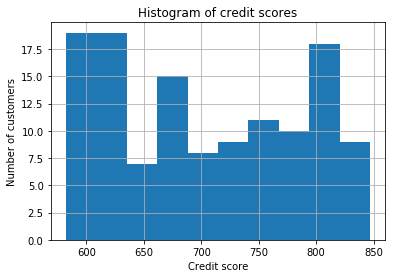

In [41]:
# The number of customers will be evenly distributed within the range of 580 to 850.
# I am excluding the range of 300 to 579 as it is unlikely that customers in this range would get a loan
# I will use random.uniform function to randomly distribute 125 customers within the range 580 to 850
# import packages numpy/matplotlib [8] and [9]

import numpy as np
import matplotlib.pyplot as plt
c = np.random.uniform(580,850,125).round().astype(np.int) # randomly applies a credit score to each customer
plt.hist(c)
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.title("Histogram of credit scores")
plt.grid(True)
plt.show()

## 2.Customer age

- The average age of a first-time mortgage borrower is 34 years as per Central Bank [3].Based on the all borrowers (new 
    and old) I would expect the average age to be in the mid-40's.Based on the Bondora peer-to-peer lending platform the 
    average age of a borrower is 43 years [4].
- Normal lending rules would incorporate a lower age threshold and upper age threshold,25 years and 65 years would be
    representative of these thresholds.


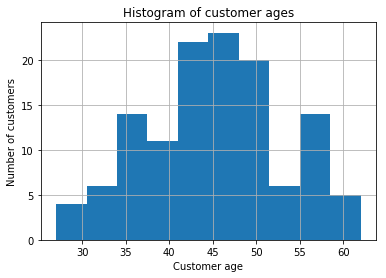

In [42]:
# An appropriate method of distribution when there are lower and upper limits would be Triangular distribution [5]
# I will use random.triangular function to distribute 125 customers within a lower age of 25,upper age of 65 and mode age of 43
# a seed is a number used to initialize a pseudorandom number generator,or start off the sequence [13]

np.random.seed(1234)
age=np.random.triangular(25, 43, 65, 125).round().astype(np.int)
h = plt.hist(age, bins=10)
plt.xlabel('Customer age')
plt.ylabel('Number of customers')
plt.title("Histogram of customer ages")
plt.grid(True)
plt.show()

In [43]:
len(age) # Confirming that number of customer ages is 125

125

## 3.Gender

- Simulate the gender of the customer based on the proportion of males and females in the labour market as reported 
    by the CSO[6]

In [4]:
# randomly genereate gender for each customer where male = M and female = F
# use a weighting based on CSO Labour Market Statistics [6]

g=np.random.choice(["M","F"], 125, p=[0.54, 0.46]) 
len(g) # Confirming that number of customer genders is 125

125

## 4.Occupation Group
- Record each customer in the appropriate Occupation Group as defined by the CSO [6]
- Simulate the Occupation Group of the customer in direct proportion as reported by the CSO [6]


![CSO](https://raw.githubusercontent.com/mikequaid/data/master/Occupation_group.PNG)

In [5]:
# randomly genereate occupation group by using the random.choice function in numpy package
# use a weighting based on CSO Labour Market Statistics [6]

o=np.random.choice(["Agriculture","Construction","Wholesale and retail","Transportation","Accommodation","ICT","Professional",
                    "Administration","Public","Education","Health","Health","FS","Other"], 125,
                   p=[0.052,0.068,0.133,0.045,0.073,0.044,0.056,0.035,0.048,0.076,0.123,0.195,0.048,0.004]) 
o
len(o) # Confirming that number of occupation groups is 125

125

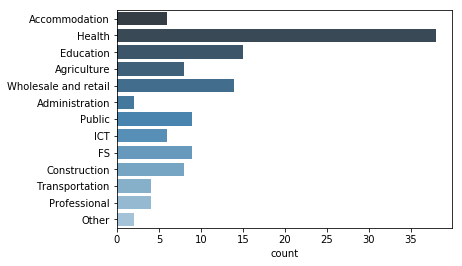

In [6]:
# display the Occupation Groups using a simple bar chart,gives a quick view of the larger occupation groups
# import package seaborn,a Python data visualization library based on matplotlib [10]

import seaborn as sns
sns.countplot(y=o, palette="Blues_d")
xlabel=('Number of customers')
plt.show()

## 5.Incident Week

In [7]:
# import package pandas [11]

import pandas as pd
rng = pd.date_range('1/1/2015', periods = 125, freq = 'W')
len(rng) # Confirming the number of weeks is 125

125

## 6.Loan repayments (euro)

In [8]:
# Calculate the loan repayments,PPI insurance covers monthly loan repayments
# An appropriate method of distribution when there are lower and upper limits would be Triangular distribution [5]
# The average loan repayments is 1,138 [7].

pay=np.random.triangular(600, 1138, 2100, 125).round().astype(np.int) #.round().astype(np.int)
len(pay) # Confirming that number of claim amounts is 125

125

## 7.Claim duration (months)

In [9]:
# calculate the number of months that the customer is unable to work
# PPI insurance covers monthly loan repayments upto a maximum of 24 months
# an appropriate method of distribution is a randint function(an array of 125 numbers in a range from 1 to 24)
# during recessions the claim duration would tend to increase,however for the purposes of this simulation
# a random distributing has been selected
# a seed is a number used to initialize a pseudorandom number generator,or start off the sequence [13]

np.random.seed(1234)
dur=np.random.randint(1, 24, 125)
len(dur) # Confirming that number of durations is 125

125

# Simulating and summarising the data set

In [10]:
# Simulate the data and variables by building a dataframe

import pandas as pd # pandas to create the dataframe
data = ({'Credit Score': [c],'Age': [age],'Gender': [g],'Occupation Group' : [o],'Incident Week' : [rng],'Loan Repayment' : [pay],
         'Claim Duration' : [dur]})
df = pd.DataFrame({"Credit Score" : c, "Age" : age, "Gender" : g, "Occupation Group" : o,"Loan repayment" : pay,
                   "Claim Duration" : dur},index=rng)
df['Claim Paid']=df['Loan repayment']*df['Claim Duration']
df.head(5) # display the first 5 records of the data set

,Credit Score,Age,Gender,Occupation Group,Loan repayment,Claim Duration,Claim Paid
2015-01-04,776,37,M,Accommodation,1039,16,16624
2015-01-11,844,47,M,Health,1605,20,32100
2015-01-18,847,43,F,Education,1493,7,10451
2015-01-25,800,51,M,Agriculture,1328,22,29216
2015-02-01,706,51,M,Education,1245,13,16185


In [11]:
print(df.shape) # this function displays the quantity of rows and columns in the dataset

(125, 7)


In [12]:
# this function displays the key statistics of the dataset
df.describe().astype(np.int)

,Credit Score,Age,Loan repayment,Claim Duration,Claim Paid
count,125,125,125,125,125
mean,712,44,1301,12,16759
std,76,8,321,6,9656
min,582,27,699,1,723
25%,649,40,1057,7,8945
50%,721,45,1288,13,17024
75%,766,51,1514,18,23085
max,849,62,2011,23,41976


In [13]:
# as the Loan repayment and Claim Duration are key drivers of the total claim cost,
# an analysis can be performed based on key variables (eg.occupation group)
# the following table displays the mean(average) by occupation group
# higher average for Loan repayments and Claim Duration will result a proportionately higher claim cost

df1=df.groupby(['Occupation Group']).mean().astype(np.int)
df1

,Credit Score,Age,Loan repayment,Claim Duration,Claim Paid
Occupation Group,,,,,
Accommodation,690,41,1127,11,13399
Administration,768,45,1286,13,14962
Agriculture,713,51,1380,12,18103
Construction,672,42,1335,10,12904
Education,716,44,1254,10,13772
FS,738,44,1216,11,15257
Health,705,45,1307,13,17319
ICT,739,46,1404,10,15151
Other,657,48,1201,10,13039


In [14]:
# the following table groups the data set by Occupation Group
# this table totals the claim duration and claim paid amount
# the top 3 occupation groups in terms of total claim amount are Health,Wholesale/Retail,Financial Services

df2=df.groupby(['Occupation Group']).sum().astype(np.int)
df2

,Credit Score,Age,Loan repayment,Claim Duration,Claim Paid
Occupation Group,,,,,
Accommodation,4143,250,6765,71,80396
Administration,1536,90,2573,26,29924
Agriculture,5708,415,11043,103,144829
Construction,5382,341,10681,80,103239
Education,10750,669,18821,157,206592
FS,6650,399,10951,102,137316
Health,26796,1712,49700,511,658147
ICT,4435,276,8427,65,90906
Other,1315,97,2402,21,26079


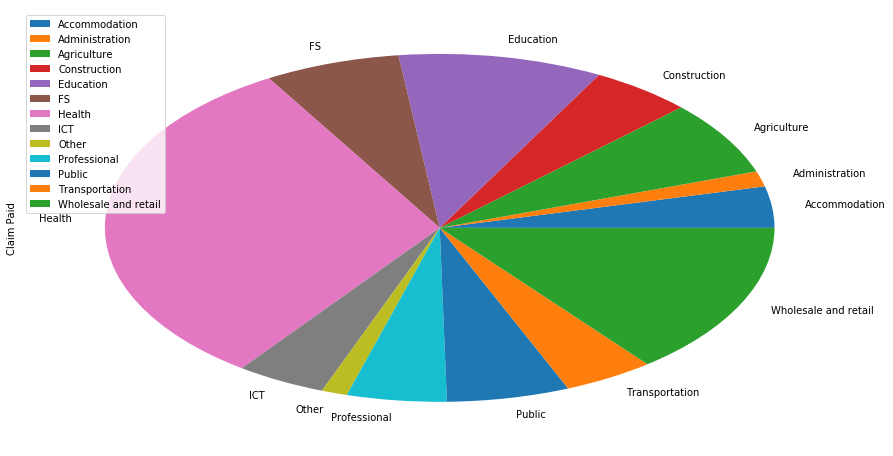

In [54]:
# Visually it can be more appealing to display a chart instead of a table of figures

df2.plot.pie(y='Claim Paid',figsize=(15,8))
plt.show()

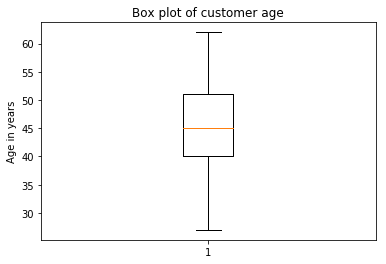

In [39]:
# display customer ages using a boxplot
# this displays the age of the middle 50% of customers in the box (very early 40's to 50)
# there is a large spread of ages in the first and fourth quartiles

data_age=age
plt.ylabel('Age in years') # title of the y axis
t = plt.title('Box plot of customer age') # title of the plot
plt.boxplot(data_age)
plt.show()

# Displaying any relationships

## Key obversations and findings:
- One very clear relationship is between Claim Duration and Claim Paid,when claim duration increases total claim paid increases:
 - Both the pairplot and scatter plot displays relationship
 - The linear model plot clearly displays the linear regression with the line of best fit
- Based on the correlation table there is a value of .88 for Claim Paid and Claim Duration,which is high positive linear correlation
- There is a relationship between Loan repayment and Claim Paid with a correlation value of .48 (+0.50 indicates a moderate positive relationship):
 - The scatter graph is not clear regarding a linear relationship
 - The linear model plot is more clear and shows a modest positive relationship,when Loan repayment is higher the Claim Paid is higher
- The boxplot of ages shows that 50% of customers are aged between 40 and 50 and there is a good spead of ages on either side of the main 50% cohort,this would align with my hypotheses at the beginning
- Regarding my Credit Score hypotheses (at the beginning),this is flawed due to my sample population and one of my original assumptions (I excluded the low credit score rating).
- Certain occupational groups account for a large portion of claim payouts (Health,Wholesale/Retail,Financial Services)

### Potential further analysis:
- Use KNN classification algorithm to predict different data points
- As PPI insurance is payable on the occurence of certain events (sickness,accidents,unemployment),further variables could be added to the data model and these variables would have very different distributions
- Extending the population from a marketing/sales perspective where there is a wider data set and further variables(eg.customer profile,propensity to take out a loan,propensity to buy PPI insurance,propensity to claim)


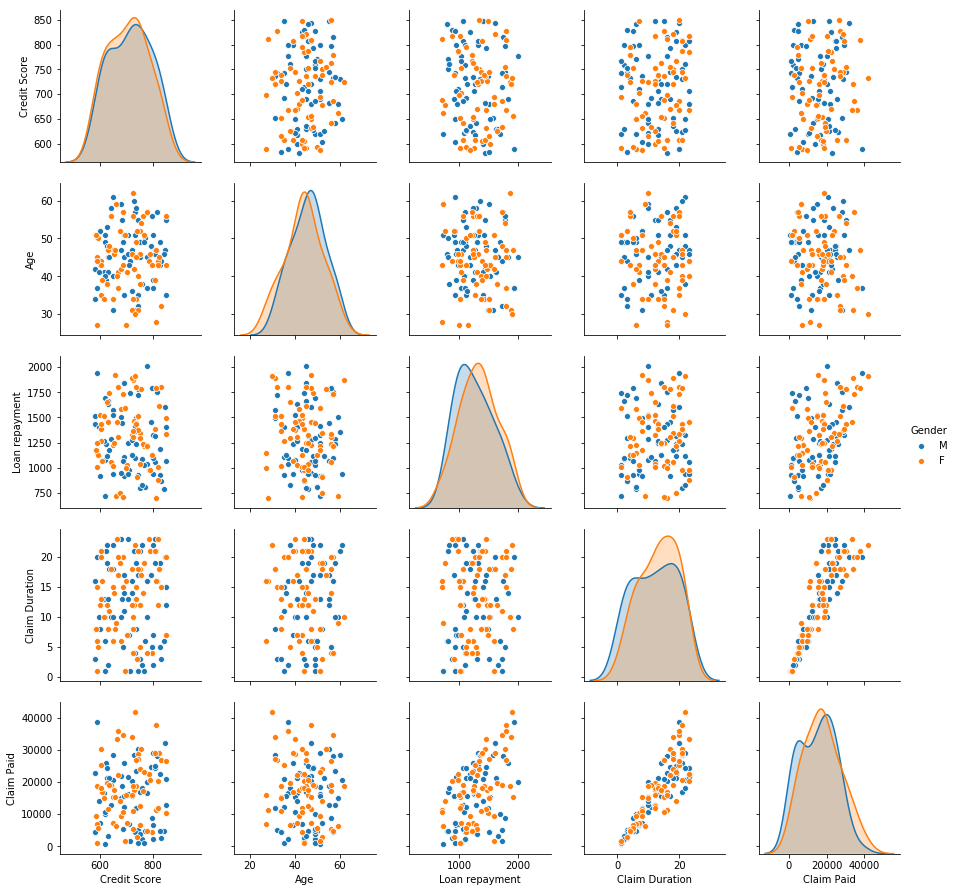

In [25]:
# seaborn is a Python data visualization library based on matplotlib [10]
# pairplot function displays relationships between two variables [11]
# pairplot will scatter plot each variable against the other 4 variables
# visually it highlights patterns in the relationship between variables
# one clear relationship is between claim duration and claim paid
# another relationship that is less clear is loan repayment and Claim Paid,this would require further analysis

import seaborn as sns
sns.pairplot(df,hue='Gender') # , height = 5
plt.show()

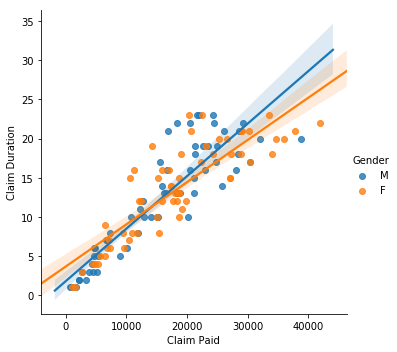

In [32]:
# display Claim Paid and Claim Duration using the linear model plot function(lmplot) from seaborn
# this function displays the line of best fit and display male and female seperately
# the shaded area around each line of best fit can be used for predicting values

sns.lmplot(x='Claim Paid', y='Claim Duration', data=df,hue='Gender')
plt.show()

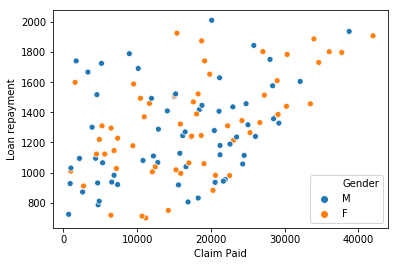

In [33]:
# display Claim Paid and Loan repayment using a scatter plot function from seaborn
# visually the data points do tend to increase from left to right,as Loan repayment increases Claim Paid increases

ax = sns.scatterplot(x="Claim Paid", y="Loan repayment", data=df,hue='Gender')

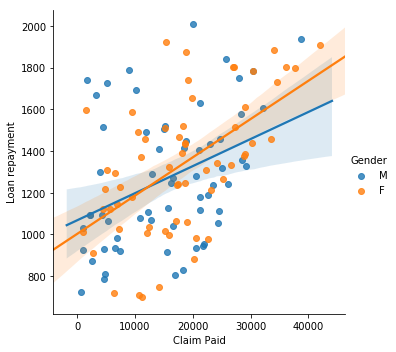

In [30]:
# display Claim Paid and Loan repayment using the linear model plot function(lmplot) from seaborn
# this function displays the line of best fit and display male and female seperately

sns.lmplot(x='Claim Paid', y='Loan repayment', data=df,hue='Gender')
plt.show()

## To review the correlations (relationships) between the X and Y variables we can run the correlation function.A correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related,where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation [15].

In [19]:
# generate the correlation table,this displays the correlation of each variable compared to the other variables
# correlation is a standard method of measuring the relationship between variables
# a coefficient of 0 means no linear relationship is present
# +0.50 indicates a moderate positive relationship

df.corr().round(2)

,Credit Score,Age,Loan repayment,Claim Duration,Claim Paid
Credit Score,1.00,0.07,-0.07,0.08,0.06
Age,0.07,1.00,-0.07,-0.03,-0.07
Loan repayment,-0.07,-0.07,1.00,0.06,0.48
Claim Duration,0.08,-0.03,0.06,1.00,0.88
Claim Paid,0.06,-0.07,0.48,0.88,1.00


# References:

[1]  CPCC  https://www.ccpc.ie/consumers/money/insurance/payment-protection-insurance/

[2]  Wikipedia FICO  https://en.wikipedia.org/wiki/Credit_score_in_the_United_States#FICO_score

[3]  Central Bank Economic Publication 25/05/2017:Measures and Irish Mortgage Lending: An Overview of Lending in 2016 https://www.centralbank.ie/docs/default-source/publications/economic-letters/vol-2017-no-6---macroprudential-and-irish-mortgage-lending-an-overview-of-lending-in-2016-kinghan-lyons-mccarthy-and-o'toole.pdf?sfvrsn=6

[4]  Bondora(peer-to-peer lending platform)  https://www.bondora.com/blog/what-is-the-average-age-of-our-borrowers/

[5]  Wikipedia  https://en.wikipedia.org/wiki/Triangular_distribution

[6]  CSO Labour Market Statistics  https://www.cso.ie/px/pxeirestat/statire/SelectTable/Omrade0.asp?Planguage=0

[7]  EBS DKM Irish Housing Affordability Index  https://www.ebs.ie/content/dam/ebs/pdfs/affordability-index/ebs-mortgage-affordability-report-2017.pdf

[8]  NumPy(scientific computing package)  https://docs.scipy.org/doc/numpy/

[9]  Matplotlib(2D plotting library)  https://matplotlib.org/contents.html

[10] Seaborn library  https://seaborn.pydata.org

[11] Pandas(open source, BSD-licensed library)  https://pandas.pydata.org/pandas-docs/stable/dsintro.html

[12] pairplot function https://seaborn.pydata.org/generated/seaborn.pairplot.html

[13] RANDOM.ORG https://www.random.org/

[14] Wikipedia https://en.wikipedia.org/wiki/Random_seed

[15] Wikipedia https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
  